# Deep Learning Models

A collection of deep learning models implemented on Pytorch for training purposes.

Author: Lucas Martinuzzo Batista<br>
GitHub: https://github.com/LucasMartinuzzo/Deep-Learning-Models

## Binary Logistic Regression from Scratch

Implementation of binary logistic regression. Positive class is 1, negative class is -1.

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
import numpy as np
import os

In [2]:
device = "cpu"
if torch.cuda.is_available():
  print("Cuda is Available!")
  device = torch.device("cuda:0")

Cuda is Available!


In [54]:
# Create two blobs
N = 300
X, y = make_blobs(n_samples=N, centers=2, cluster_std=1, n_features=2, random_state=2)

# change labels 0 to -1
y[y==0] = -1

print("X.shape =", X.shape, "  y.shape =", y.shape)

X.shape = (300, 2)   y.shape = (300,)


In [55]:
train_size = int(0.7*N)

In [56]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (300, 2)
y shape: (300,)


In [57]:
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [58]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (210, 2)
y_train shape: (210,)
X_test shape: (210, 2)
y_test shape: (90,)


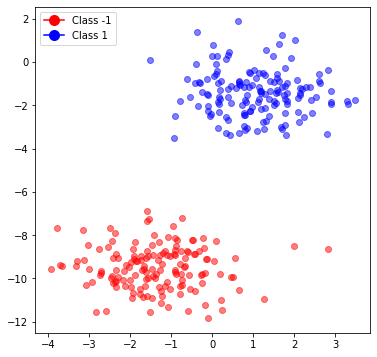

In [59]:
fig = plt.figure(figsize=(6,6))

# plot negatives in red
plt.scatter(X[y==-1,0], \
            X[y==-1,1], \
            alpha = 0.5,\
            c = 'red')

# and positives in blue
plt.scatter(x=X[y==1,0], \
            y=X[y==1,1], \
            alpha = 0.5, \
            c = 'blue')

P=+1
N=-1
legend_elements = [ Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
                    Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10) ]

plt.legend(handles=legend_elements, loc='best')
plt.show()      


In [60]:
n_features = X.shape[1]

In [61]:
n_features

2

In [62]:
class BinaryLogRegression():
  #Constructor
    def __init__(self,n_features,weights=None):
        #The weights is being set with n_feature +1 variables. The +1 is the bias.
        if weights is None:
            self.weights_b = torch.rand(n_features+1,1,dtype=torch.float32,device=device)
        else:
            self.weights_b = torch.Tensor(weights).to(device).view(n_features+1,-1)
        self.n_features = n_features
        
    def sigmoid(self,linear):
        return 1./(1+torch.exp(-linear))
    
    def forward(self,X_,threshold=0.5):
        X = torch.cat((torch.ones(X_.size()[0], 1,device=device), X_), axis = 1)
        linear = torch.matmul(X,self.weights_b)
        sig = self.sigmoid(linear).view(-1)
        if threshold is None:
            return sig
        else:
            return np.where(sig.cpu().numpy()>=threshold,1,-1)
    
    def cross_entropy_loss(self,X,y):
        return torch.mean(torch.log(1. + torch.exp(-y.view(-1,1)*torch.matmul(X,self.weights_b))))
    
    def cross_entropy_gradient(self,X,y):
        N = X.size()[0]
        return -torch.matmul(X.T,
                             y.view(-1,1)/(1. + torch.exp(y.view(-1,1)*torch.matmul(X,self.weights_b)))
                            )/N

    def train(self,X_,y,learning_rate=1e-2,epochs=1000):
        X = torch.cat((torch.ones(X_.size()[0], 1,device=device), X_), axis = 1)
        LOSS = []
        for epoch in range(epochs):
            LOSS.append(self.cross_entropy_loss(X,y).cpu().numpy())
            cross_grad = self.cross_entropy_gradient(X,y)
            #if epoch % 1000 == 0:
            #    print(self.weights_b)
            self.weights_b = self.weights_b - learning_rate*cross_grad
        LOSS.append(self.cross_entropy_loss(X,y).cpu().numpy())
        return LOSS

    def evaluate_acc(self,X,y):
        yhat = self.forward(X)
        return np.sum(yhat == y)/(len(y))

In [71]:
X_train_tensor = torch.Tensor(X_train).to(device)
y_train_tensor = torch.Tensor(y_train).to(device)

In [75]:
log_reg = BinaryLogRegression(n_features)

In [76]:
LOSS = log_reg.train(X_train_tensor,y_train_tensor,learning_rate=0.05,epochs=10000)

In [77]:
print('Model parameters:')
print('Weights and bias: %s' % log_reg.weights_b)

Model parameters:
Weights and bias: tensor([[6.6243],
        [0.9737],
        [1.3128]], device='cuda:0')


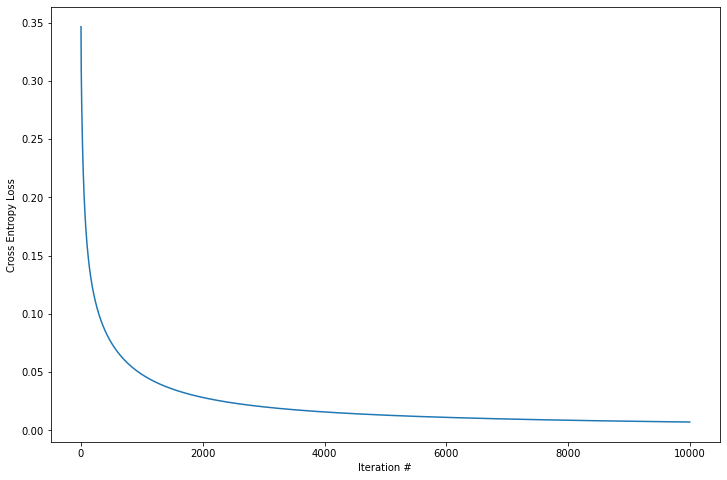

In [78]:
plt.figure(figsize = (12, 8))
plt.plot(LOSS)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [79]:
X_test_tensor = torch.Tensor(X_test).to(device)
y_test_tensor = torch.Tensor(y_test).to(device)
print("Accuracy:",log_reg.evaluate_acc(X_test_tensor,y_test))

Accuracy: 1.0


In [82]:
y_pred = log_reg.forward(X_test_tensor)

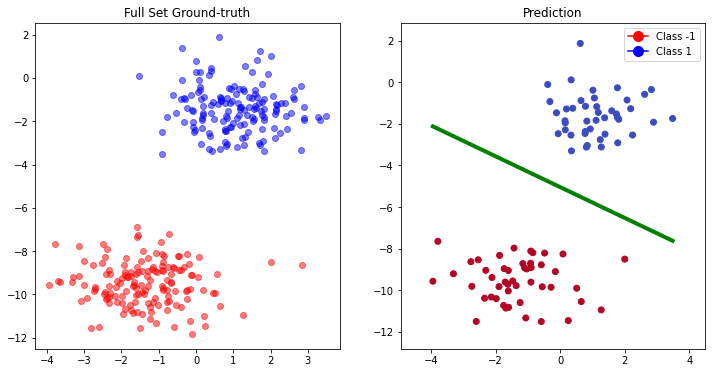

In [84]:
x1min = min(X[:,0])
x1max = max(X[:,0])
x2min = min(X[:,1])
x2max = max(X[:,1])

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.set_title("Full Set Ground-truth")

# plot negatives in red
ax1.scatter(X[y==-1,0], \
            X[y==-1,1], \
            alpha = 0.5, \
            c = 'red')

# and positives in blue
ax1.scatter(x=X[y==1,0], \
            y=X[y==1,1], \
            alpha = 0.5, \
            c = 'blue')

ax2 = fig.add_subplot(122)

ax2.set_title("Prediction")
ax2.scatter(x = X_test[:,0], y = X_test[:,1], c = -y_pred, cmap = 'coolwarm')
ax2.legend(handles=legend_elements, loc='best')
ax2.set_xlim([x1min-1, x1max+1])
ax2.set_ylim([x2min-1, x2max+1])

w_logistic = log_reg.weights_b.cpu().numpy()
p1 = (x1min, -(w_logistic[0] + (x1min)*w_logistic[1])/w_logistic[2])
p2 = (x1max, -(w_logistic[0] + (x1max)*w_logistic[1])/w_logistic[2])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()
        

## Binary Logistic Regression using Pytorch Features

Implementation of binary logistic regression. Positive class is 1, negative class is -1.

In [158]:
class BinaryLogRegressionPyTorch(nn.Module):
  #Constructor
    def __init__(self,n_features):
        super(BinaryLogRegressionPyTorch,self).__init__()
        
        #The weights is being set with n_feature +1 variables. The +1 is the bias.
        self.linear = nn.Linear(n_features,1).to(device)
        torch.nn.init.uniform_(self.linear.weight)
    
    def forward(self,x):
        x = torch.sigmoid(self.linear(x))
        return x
    

In [159]:
def train(model,optimizer,loss_criterion,X_train,y_train,epochs):
    LOSS = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_hat = model(X_train)
        loss = loss_criterion(y_hat,y_train)
        loss.backward()
        optimizer.step()
        LOSS.append(loss.cpu().detach())
    return LOSS

In [160]:
y_train_tensor.size()

torch.Size([210])

In [176]:
model = BinaryLogRegressionPyTorch(n_features)
optimizer = torch.optim.SGD(model.parameters(),lr=0.2)
loss = nn.BCELoss()

In [177]:
LOSS = train(model,optimizer,loss,X_train_tensor,y_train_tensor.view(-1,1),epochs=10000)

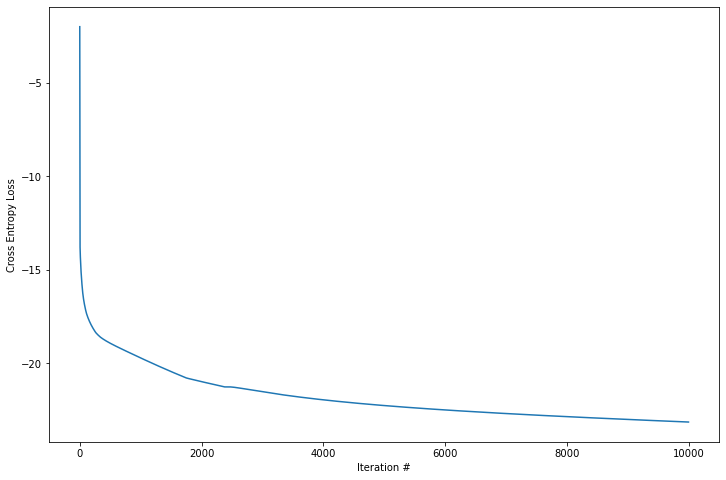

In [178]:
plt.figure(figsize = (12, 8))
plt.plot(LOSS)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [179]:
def evaluate_acc(yhat,y):
    return np.sum(yhat == y)/(len(y))
print("Accuracy:",log_reg.evaluate_acc(X_test_tensor,y_test))

Accuracy: 1.0


In [180]:
y_pred = model(X_test_tensor).cpu().detach().numpy()

In [181]:
weights = model.state_dict()['linear.weight'].cpu().detach().numpy()[0]

In [182]:
bias = model.state_dict()['linear.bias'].cpu().detach().numpy()

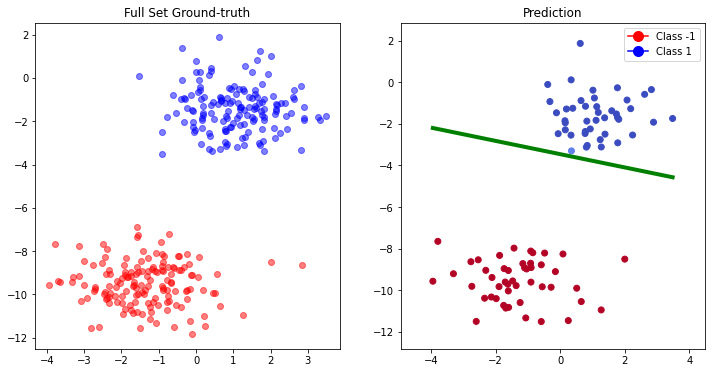

In [184]:
x1min = min(X[:,0])
x1max = max(X[:,0])
x2min = min(X[:,1])
x2max = max(X[:,1])

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.set_title("Full Set Ground-truth")

# plot negatives in red
ax1.scatter(X[y==-1,0], \
            X[y==-1,1], \
            alpha = 0.5, \
            c = 'red')

# and positives in blue
ax1.scatter(x=X[y==1,0], \
            y=X[y==1,1], \
            alpha = 0.5, \
            c = 'blue')

ax2 = fig.add_subplot(122)

ax2.set_title("Prediction")
ax2.scatter(x = X_test[:,0], y = X_test[:,1], c = -y_pred, cmap = 'coolwarm')
ax2.legend(handles=legend_elements, loc='best')
ax2.set_xlim([x1min-1, x1max+1])
ax2.set_ylim([x2min-1, x2max+1])

w_logistic = log_reg.weights_b.cpu().numpy()
p1 = (x1min, -(bias[0] + (x1min)*weights[0])/weights[1])
p2 = (x1max, -(bias[0] + (x1max)*weights[0])/weights[1])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()
        